<a href="https://colab.research.google.com/github/achmadffi/Diamond-Price-Prediction/blob/main/Diamond_Price_Prediction_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Diamond Price Prediction

## 1.&nbsp;Introduction
- Adapun proyek ini membahas mengenai bagaimana memprediksi harga diamond dengan menggunakan dataset berasal dari kaggle.

- Informasi dataset sebagai berikut:

| Jenis | Keterangan |
| ------ | ------ |
| Title | Data Analysis on Diamonds Dataset |
| Source | [Kaggle](https://www.kaggle.com/datasets/swatikhedekar/price-prediction-of-diamond) |
| Maintainer | [Swati Khedekar ⚡](https://www.kaggle.com/swatikhedekar) |
| License | Other (specified in description) |
| Visibility | Publik |
| Tags | Religion and Belief System, Beginner, Pandas, Matplotlib, Data Visualization, Regression, Exploratory Data Analysis_ |
| Usability | 10.00 |

## 2.&nbsp;Data Understading
- Pada tahap ini dilakukan eksplorasi data (Exploratory Data Analysis/EDA) untuk memahami struktur dan karakteristik dataset.

- Analisis mencakup identifikasi variabel yang tersedia, pengecekan nilai yang hilang (missing values), pendeteksian data duplikat, pencarian outlier, serta analisis hubungan secara univariat (satu variabel) dan multivariat (antar variabel).

- Langkah-langkah ini penting untuk memastikan kualitas data dan memahami pola awal sebelum masuk ke tahap pemodelan.

### 2.1 Import Library dan Package

In [ ]:
# Library umum
import math
import warnings
import kagglehub
import random
import itertools
warnings.filterwarnings('ignore')

# Library analisis dan visualisasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Library Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
import pickle

### 2.2 Data Loading (Mengumpulkan Data)

In [ ]:
path = kagglehub.dataset_download("swatikhedekar/price-prediction-of-diamond")
print("Path to dataset files:", path)

diamonds_df = pd.read_csv(path + "/diamonds.csv")
diamonds_df.head()

100%|██████████| 733k/733k [00:00<00:00, 88.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/swatikhedekar/price-prediction-of-diamond/versions/3


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
diamonds_df.shape

(53940, 11)

### 2.3 Deskripsi Variabel (Mengumpulkan Data)

In [ ]:
# Cek kolom/variabel datanya
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
pd.DataFrame({'Kolom':diamonds_df.columns,
              'Tipe Data':diamonds_df.dtypes,
              'Jumlah Data Non-Null':diamonds_df.count(),
              'Jumlah Data Unik':diamonds_df.nunique(),
              'Contoh Data Unik':diamonds_df.apply(lambda x:', '.join(map(str, x.unique()[:8])))
            }).reset_index(drop=True)

,Kolom,Tipe Data,Jumlah Data Non-Null,Jumlah Data Unik,Contoh Data Unik
0,Unnamed: 0,int64,53940,53940,"1, 2, 3, 4, 5, 6, 7, 8"
1,carat,float64,53940,273,"0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3"
2,cut,object,53940,5,"Ideal, Premium, Good, Very Good, Fair"
3,color,object,53940,7,"E, I, J, H, F, G, D"
4,clarity,object,53940,8,"SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF"
5,depth,float64,53940,184,"61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9"
6,table,float64,53940,127,"55.0, 61.0, 65.0, 58.0, 57.0, 56.0, 54.0, 62.0"
7,price,int64,53940,11602,"326, 327, 334, 335, 336, 337, 338, 339"
8,x,float64,53940,554,"3.95, 3.89, 4.05, 4.2, 4.34, 3.94, 4.07, 3.87"
9,y,float64,53940,552,"3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 4.11, 3.78"


- Insight:
  - Dari Hasil EDA dengan melihat variabel dan karateristiknya maka beberapa insight yang ditemukan:

1. **Penjelasan per Kolom** dijelaskan dibawah:
  - price: Harga berlian dalam dolar Amerika Serikat ($), yang merupakan label dalam analisis ini.

  - carat: Bobot berlian dalam satuan carat, yang digunakan sebagai ukuran dari batu permata dan perhiasan.

  - cut: Kualitas pemotongan berlian, yang memengaruhi bagaimana cahaya dipantulkan dari berlian tersebut. Kualitas cut dibagi dalam 5 kategori: Fair, Good, Very Good, Premium, dan Ideal, dengan Ideal sebagai yang terbaik dan Fair sebagai yang terendah.

  - color: Warna berlian, yang diukur dalam skala dari D (warna terbaik, sangat jernih) hingga J (paling buruk). Semakin dekat ke D, semakin tinggi kualitas berlian tersebut.

  - clarity: Tingkat kejernihan berlian diukur berdasarkan jumlah dan jenis inklusi (cacat) yang ada di dalamnya. Kategori kejernihan berlian dari yang terburuk hingga terbaik adalah sebagai berikut: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF (terbaik).

  - x: Panjang berlian dalam satuan milimeter (mm).

  - y: Lebar berlian dalam satuan milimeter (mm).

  - z: Kedalaman berlian dalam satuan milimeter (mm).

  - depth: Rasio kedalaman berlian yang dihitung sebagai 2 * z / (x + y).

  - table: Lebar bagian atas berlian relatif terhadap titik terlebar. Rasio ini memengaruhi pencahayaan dan efek visual berlian.                                                               |

  - Sebagai referensi untuk pemahaman lebih lanjut mengenai kualitas berlian dan klasifikasinya, dapat dilihat pada sumber [ggplot2 Tidyverse Diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html), yang memberikan deskripsi lengkap mengenai karakteristik berlian serta standar kualitas seperti cut, color, dan clarity.

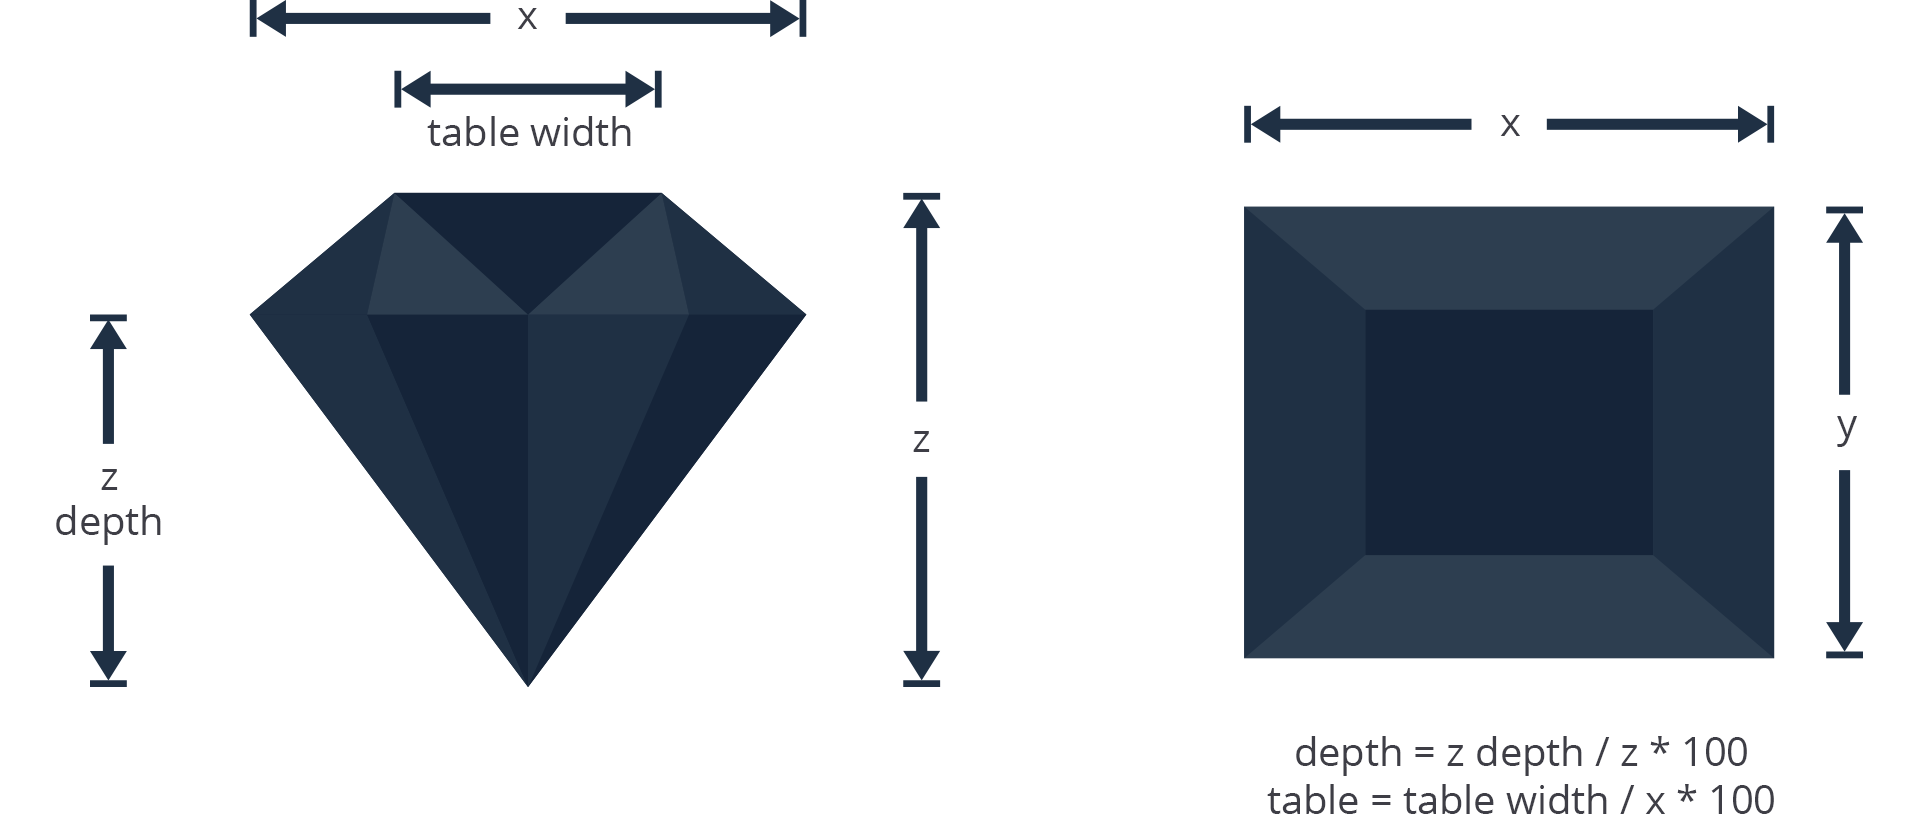

2. **Unnamed: 0**: Kolom ini tampaknya hanya berfungsi sebagai index yang tidak memiliki informasi berguna untuk analisis atau pemodelan. Oleh karena itu, **kolom ini harus dihapus**.

3. Terdapat **53.940 baris** dengan **10 kolom** dimana **3 kolom bertipe object (kategorikal)**, yaitu cut, color, dan clarity. Sedangkan **kolom numerik (kontinu) terdiri dari 7 kolom**, yaitu carat, depth, table, price, x, y, dan z.

In [ ]:
diamonds_df_eda = diamonds_df.copy()

### 2.4 Statistik Deskriptif (Menelaah Data)

In [ ]:
# Cek informasi statistik dari dataset
diamonds_df_eda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


- Insight:
  - Ditemukan kejanggalan pada kolom x, y, dan z, di mana terdapat nilai minimum sebesar 0.
  - Nilai 0 pada panjang, lebar, dan kedalaman berlian mustahil ada karena ukuran fisik berlian tidak mungkin nol.
  - Kemungkinan besar, nilai 0 tersebut merupakan representasi dari data yang hilang (missing value) yang disamarkan.

### 2.5 Univariate Analysis (Menelaah Data)

#### 2.5.1 Catagorical Features
- Pada tahapan ini, akan dibuat barplot untuk melihat distribusi jumlah data berdasarkan kategori pada setiap fitur.

In [ ]:
# Membuat fungsi menampilkan fitur kategori
def categorical_check(df, col):
  count = df[col].value_counts()
  percentage = 100 * df[col].value_counts(normalize=True)
  col_df = pd.DataFrame({'Jumlah Sampel' : count, 'persentase' : percentage.round(1)})
  col_df['persentase'] = col_df['persentase'].astype('str') + '%'

  plt.figure(figsize=(10,6))
  palette = ['pastel', 'muted', 'deep', 'bright', 'dark', 'Set2', 'colorblind']
  ax = sns.barplot(x=col_df.index, y=col_df['Jumlah Sampel'], palette=random.choice(palette))
  for i,v in enumerate(col_df['Jumlah Sampel']):
    ax.text(i, v, str(v), ha='center', va='bottom')
  plt.xlabel(col)
  plt.ylabel('Jumlah Sampel')
  plt.title(f'{col}')
  plt.show

  return col_df

,Jumlah Sampel,persentase
cut,,
Ideal,21551,40.0%
Premium,13791,25.6%
Very Good,12082,22.4%
Good,4906,9.1%
Fair,1610,3.0%


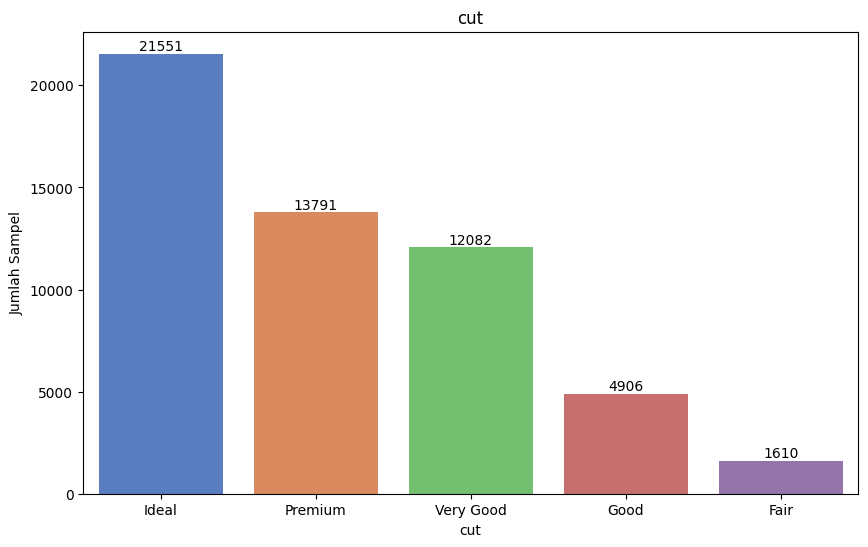

In [ ]:
categorical_check(diamonds_df_eda, 'cut')

- Insight:
  - Berdasarkan visualisasi, mayoritas cut dari diamond berada pada kategori yang baik, yaitu Ideal dan Premium, yang secara keseluruhan mencakup sekitar 65% dari total data.

  - Sementara itu, cut dengan kualitas terendah yaitu Fair, hanya mencakup sekitar 3% dari keseluruhan sampel.

,Jumlah Sampel,persentase
color,,
G,11292,20.9%
E,9797,18.2%
F,9542,17.7%
H,8304,15.4%
D,6775,12.6%
I,5422,10.1%
J,2808,5.2%


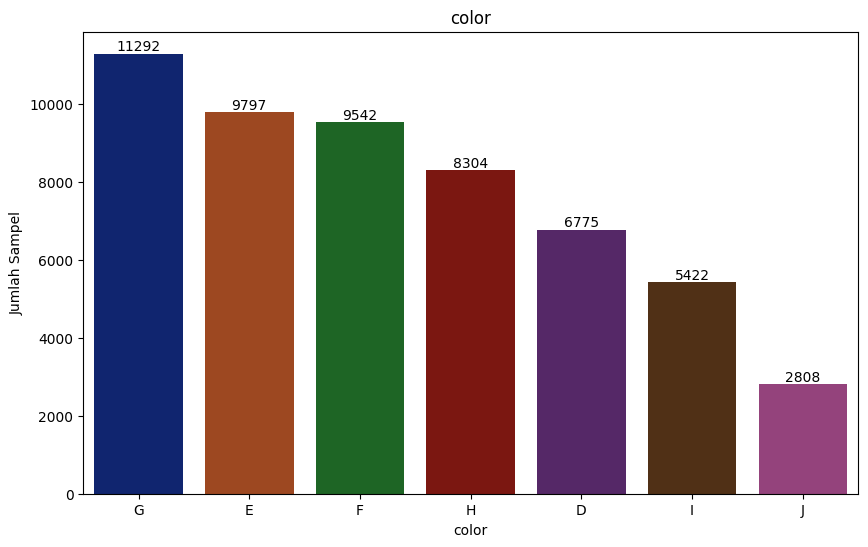

In [ ]:
categorical_check(diamonds_df_eda, 'color')

- Insight:
  - Berdasarkan grafik di atas, sebagian besar diamond berada pada kualitas color (warna) yang tergolong menengah hingga agak baik, yaitu pada color G, E, dan F, yang mencakup sekitar 56% dari total data.

,Jumlah Sampel,persentase
clarity,,
SI1,13065,24.2%
VS2,12258,22.7%
SI2,9194,17.0%
VS1,8171,15.1%
VVS2,5066,9.4%
VVS1,3655,6.8%
IF,1790,3.3%
I1,741,1.4%


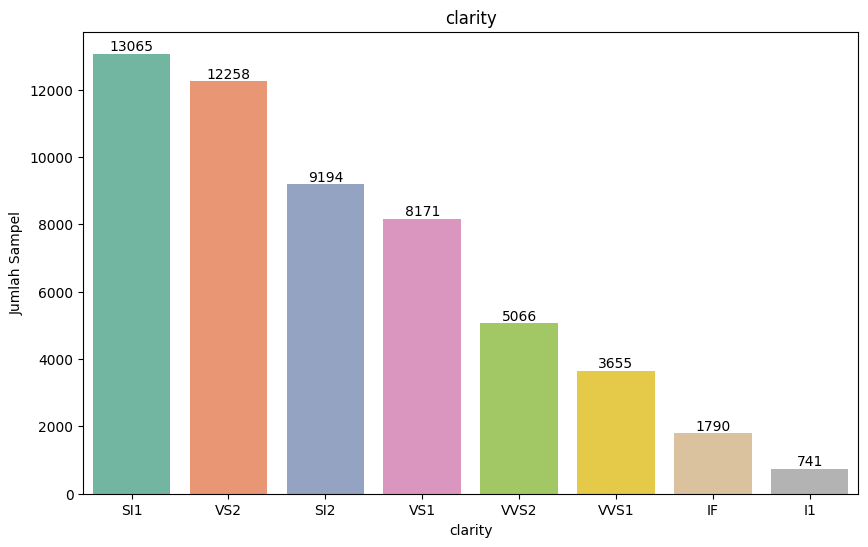

In [ ]:
categorical_check(diamonds_df_eda, 'clarity')

- Insight:
  - Berdasarkan grafik di atas, sebagian besar diamond berkualitas kejernihan (clarity) yang rendah hingga menengah, dengan sekitar 64% di antaranya berada pada kategori SI2, SI1, dan VS2.

  - Di sisi lain, berlian dengan kualitas kejernihan terendah (I1) hanya mencakup sekitar 1%, sementara yang memiliki kualitas terbaiknya (IF) mencapai sekitar 3% dari total data.

#### 2.5.2 Numerical Feature

- Membuat visualisasi fitur numerikal dengan histogram untuk melihat persebaran datanya

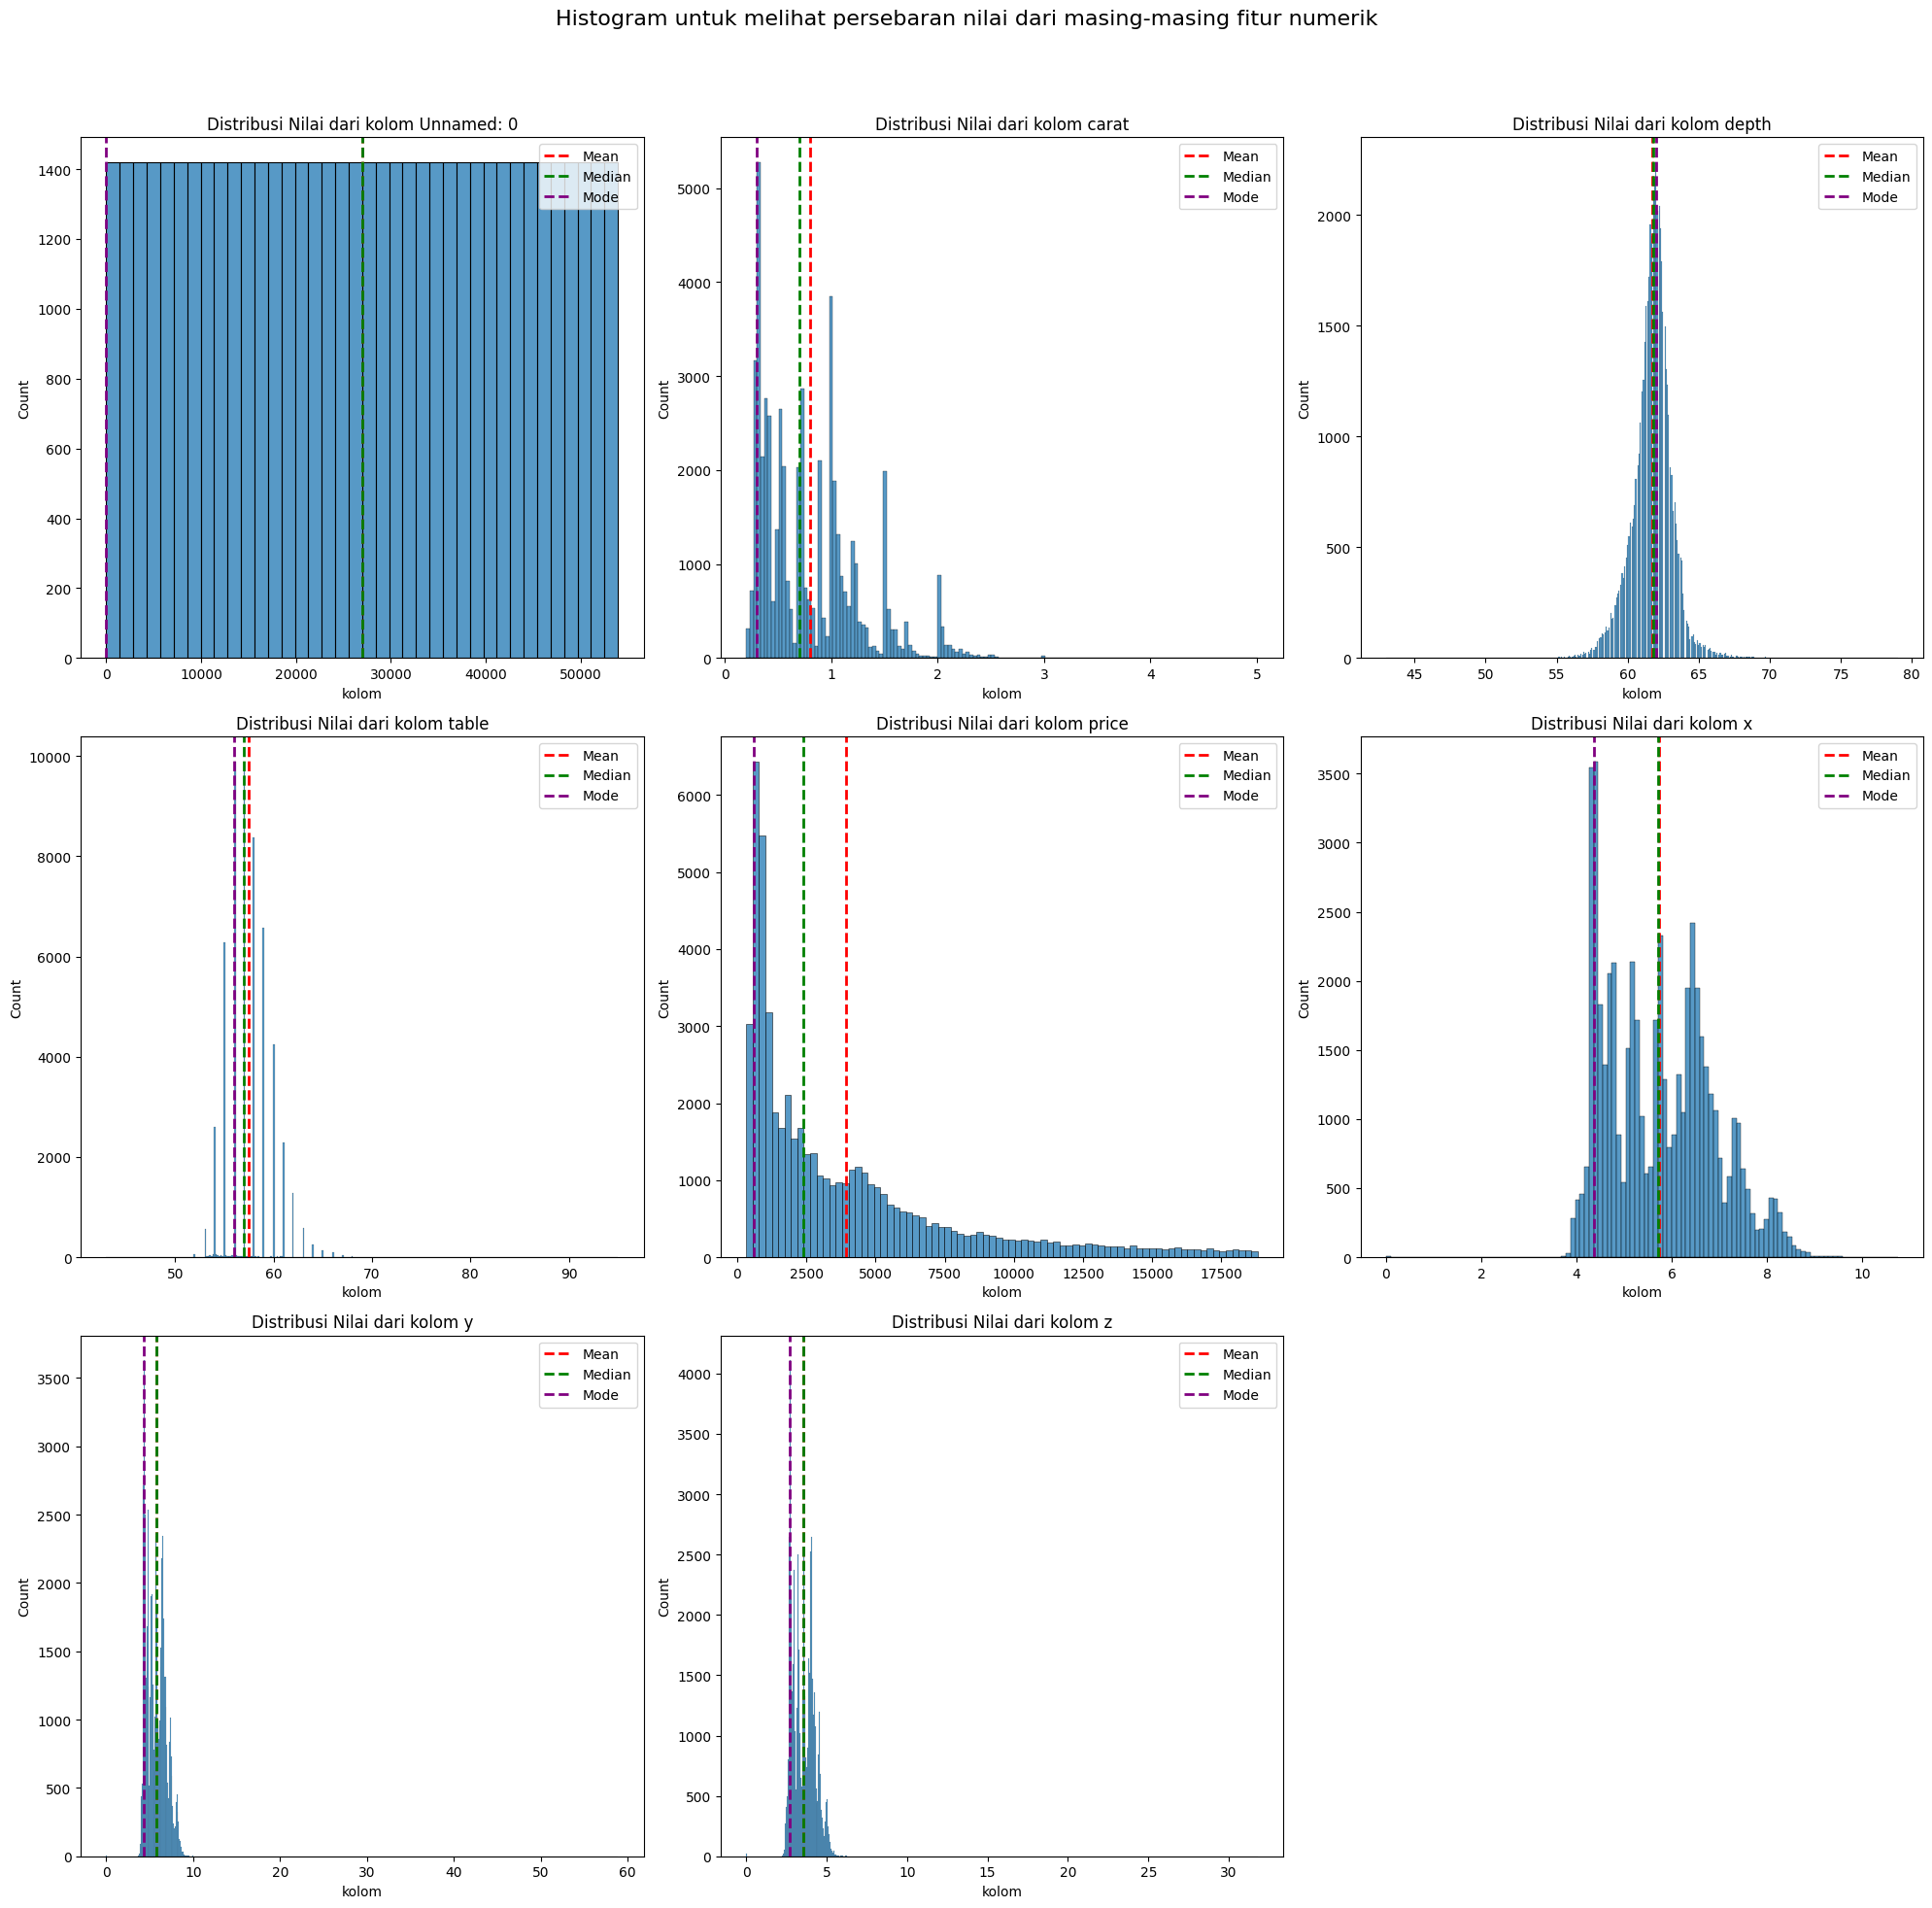

In [ ]:
# Membuat visualisasi dengan barplot
diamonds_df_eda_num = diamonds_df_eda.select_dtypes(include='number')

## Mempersiapkan datanya
max_col = 3
max_row = math.ceil(len(diamonds_df_eda_num.columns)/max_col)

## Membuat plot
plt.figure(figsize=(20, 20))

for i, col in enumerate(diamonds_df_eda_num.columns):
  mean_value = diamonds_df_eda_num[col].mean()
  median_value = diamonds_df_eda_num[col].median()
  mode_value = diamonds_df_eda_num[col].mode()[0]

  plt.subplot(max_row, max_col, i+1)
  sns.histplot(data=diamonds_df_eda_num, x=col)

  plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
  plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')
  plt.axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label='Mode')
  plt.legend()

  plt.title(f'Distribusi Nilai dari kolom {col}')
  plt.xlabel('kolom')

plt.suptitle('Histogram untuk melihat persebaran nilai dari masing-masing fitur numerik', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
diamonds_df_eda_num.skew()

,0
Unnamed: 0,0.000000
carat,1.116646
depth,-0.082294
table,0.796896
price,1.618395
x,0.378676
y,2.434167
z,1.522423


- Insight:

  1. carat
    - Distribusi nilai pada kolom carat bersifat right-skewed sedang. Hal ini ditunjukkan oleh skewness sebesar 1.116, serta pola histogram di mana sebagian besar data berada pada nilai kecil dengan ekor yang memanjang ke kanan. Rata-rata (mean) lebih besar dari median dan modus.

  2. depth
    - Distribusi nilai pada kolom depth mendekati normal (simetris). Skewness-nya sangat kecil, yaitu -0.082, dan mean, median, serta modus hampir berhimpitan. Bentuk histogram pun memperlihatkan sebaran yang simetris di sekitar pusat data.

  3. table
    - Kolom table menunjukkan distribusi sedikit right-skewed, dengan nilai skewness sebesar 0.796. Histogram menggambarkan puncak distribusi di tengah dengan sedikit pergeseran nilai ke kanan, serta mean yang sedikit lebih besar dari median dan modus.

  4. price
    - Distribusi nilai pada kolom price bersifat sangat right-skewed, dengan skewness sebesar 1.618. Histogram menunjukkan konsentrasi data pada nilai rendah dan ekor panjang ke kanan. Perbedaan antara mean, median, dan modus cukup mencolok.

  5. x
    - Kolom x memiliki distribusi sedikit right-skewed, ditunjukkan oleh skewness sebesar 0.378. Histogram memperlihatkan sebaran yang relatif seimbang namun tetap memiliki kecenderungan ke kanan.

  6. y
   - Distribusi kolom y bersifat sangat right-skewed, dengan nilai skewness tertinggi yaitu 2.434. Histogram menunjukkan banyak nilai kecil di sisi kiri dengan ekor distribusi yang sangat panjang ke kanan. Mean, median, dan modus berhimpitan di bagian kiri.

  7. z
   - Distribusi nilai pada kolom z juga sangat right-skewed, dengan skewness sebesar 1.522. Polanya serupa dengan kolom y, di mana mayoritas data terkumpul pada nilai kecil dan sebagian kecil tersebar jauh di nilai tinggi. Mean, median, dan modus saling berdekatan di bagian kiri distribusi.

- Fitur-fitur yang memiliki distribusi right-skewed disarankan untuk ditransformasi menggunakan logarithmic transformation atau power transformation guna mendekatkan distribusi ke bentuk normal. dan meningkatkan performa model.

### 2.6 Multivariate Analysis (Menelaah Data)

#### 2.6.1 Categorical Feature
- Pada bagian ini, dilakukan pembuatan tabel dan barplot untuk melihat hubungan atau korelasi antara fitur kategorikal dengan label atau target, yaitu price.

In [ ]:
diamonds_df_eda_cat = diamonds_df_eda.select_dtypes(exclude='number')

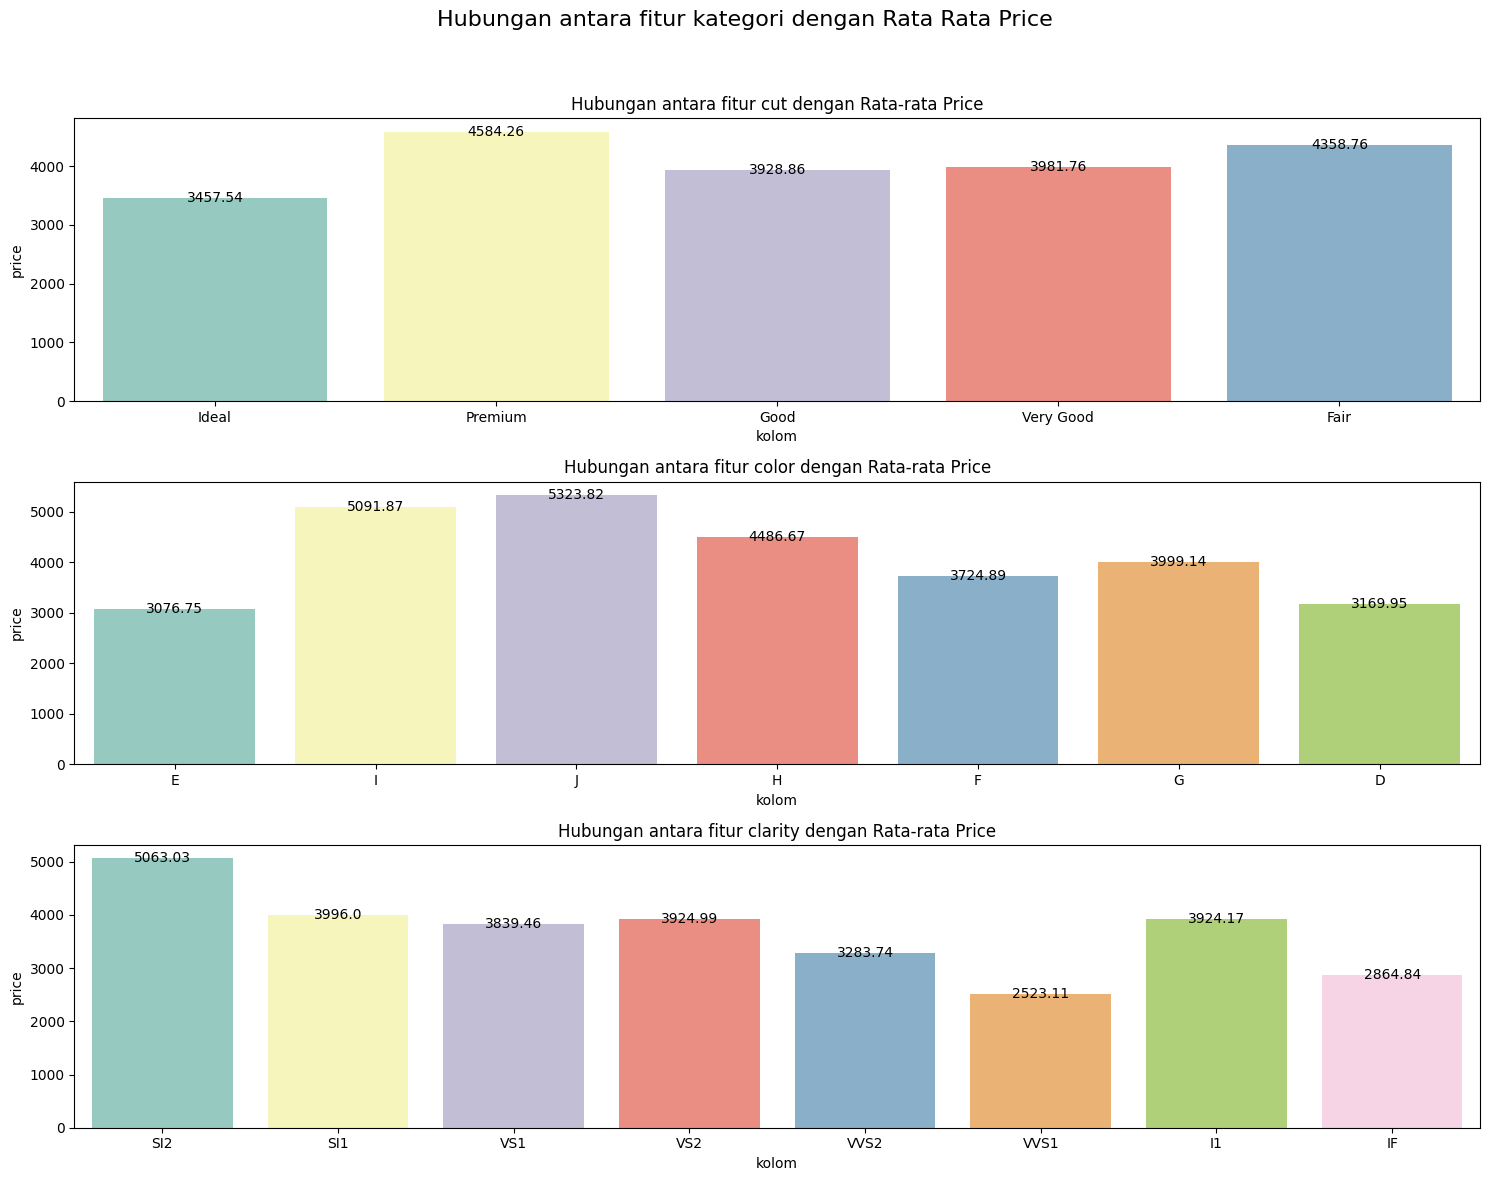

In [ ]:
# Membuat visualisasi dengan barplot

## Mempersiapkan datanya
max_col = 1
max_row = math.ceil(len(diamonds_df_eda_cat.columns)/max_col)

## Membuat plot
plt.figure(figsize=(15, 12))

for i, col in enumerate(diamonds_df_eda_cat.columns):
  plt.subplot(max_row, max_col, i+1)
  ax = sns.barplot(data=diamonds_df, x=col, y='price', palette='Set3', errorbar=None, estimator='mean')
  for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            round(bar.get_height(), 2),
            ha='center',
            va='center')

  plt.title(f'Hubungan antara fitur {col} dengan Rata-rata Price')
  plt.xlabel('kolom')
  plt.ylabel('price')

plt.suptitle('Hubungan antara fitur kategori dengan Rata Rata Price', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Insight:
  - Meskipun terdapat perbedaan kualitas dalam setiap fitur kategorikal (cut, color, clarity), harga rata-rata diamond tetap berada dalam kisaran yang relatif mirip, tanpa fluktuasi yang signifikan. Ini menunjukkan bahwa kualitas kategori tidak secara langsung menentukan harga. Berikut detailnya:

    1. Fitur cut:
    - Rata-rata harga diamond berada dalam rentang 3400 hingga 4500 untuk semua kategori cut. Bahkan, grade tertinggi seperti Ideal justru memiliki harga rata-rata yang lebih rendah dibandingkan beberapa grade lain. Ini menunjukkan bahwa cut memiliki pengaruh yang relatif kecil terhadap harga.

    2. Fitur color:
    - Warna terbaik dimulai dari grade D (paling bening), dan menurun ke E, F, hingga J. Namun, data menunjukkan bahwa harga rata-rata diamond tidak selalu lebih tinggi pada grade warna yang lebih baik. Bahkan, grade D tidak memiliki rata-rata harga tertinggi. Ini mengindikasikan bahwa fitur color memiliki pengaruh yang rendah terhadap harga.

    3. Fitur clarity:
    - Meskipun grade clarity yang lebih tinggi (misalnya IF atau VVS1) secara teknis lebih baik, rata-rata harganya tidak selalu lebih tinggi. Beberapa grade menengah seperti VS2 atau SI1 justru menunjukkan harga rata-rata yang cukup tinggi, menandakan bahwa fitur clarity juga memiliki pengaruh yang terbatas terhadap harga.

  - Ketiga fitur kategorikal (cut, color, dan clarity) memiliki pengaruh yang rendah terhadap perubahan rata-rata harga diamond.

- Selanjutnya, dilakukan pengujian hipotesis chi-square untuk melihat hubungan antar fitur kategorikal dan apakah terdapat multikolinearitas. Hasilnya dapat dilihat dalam heatmap.

#### 2.6.2 Numerical Feature
- Disini, saya mau melihat hubungan/korelasi antara fitur numerik dengan label/targetnya yaitu price

##### a. Regplot

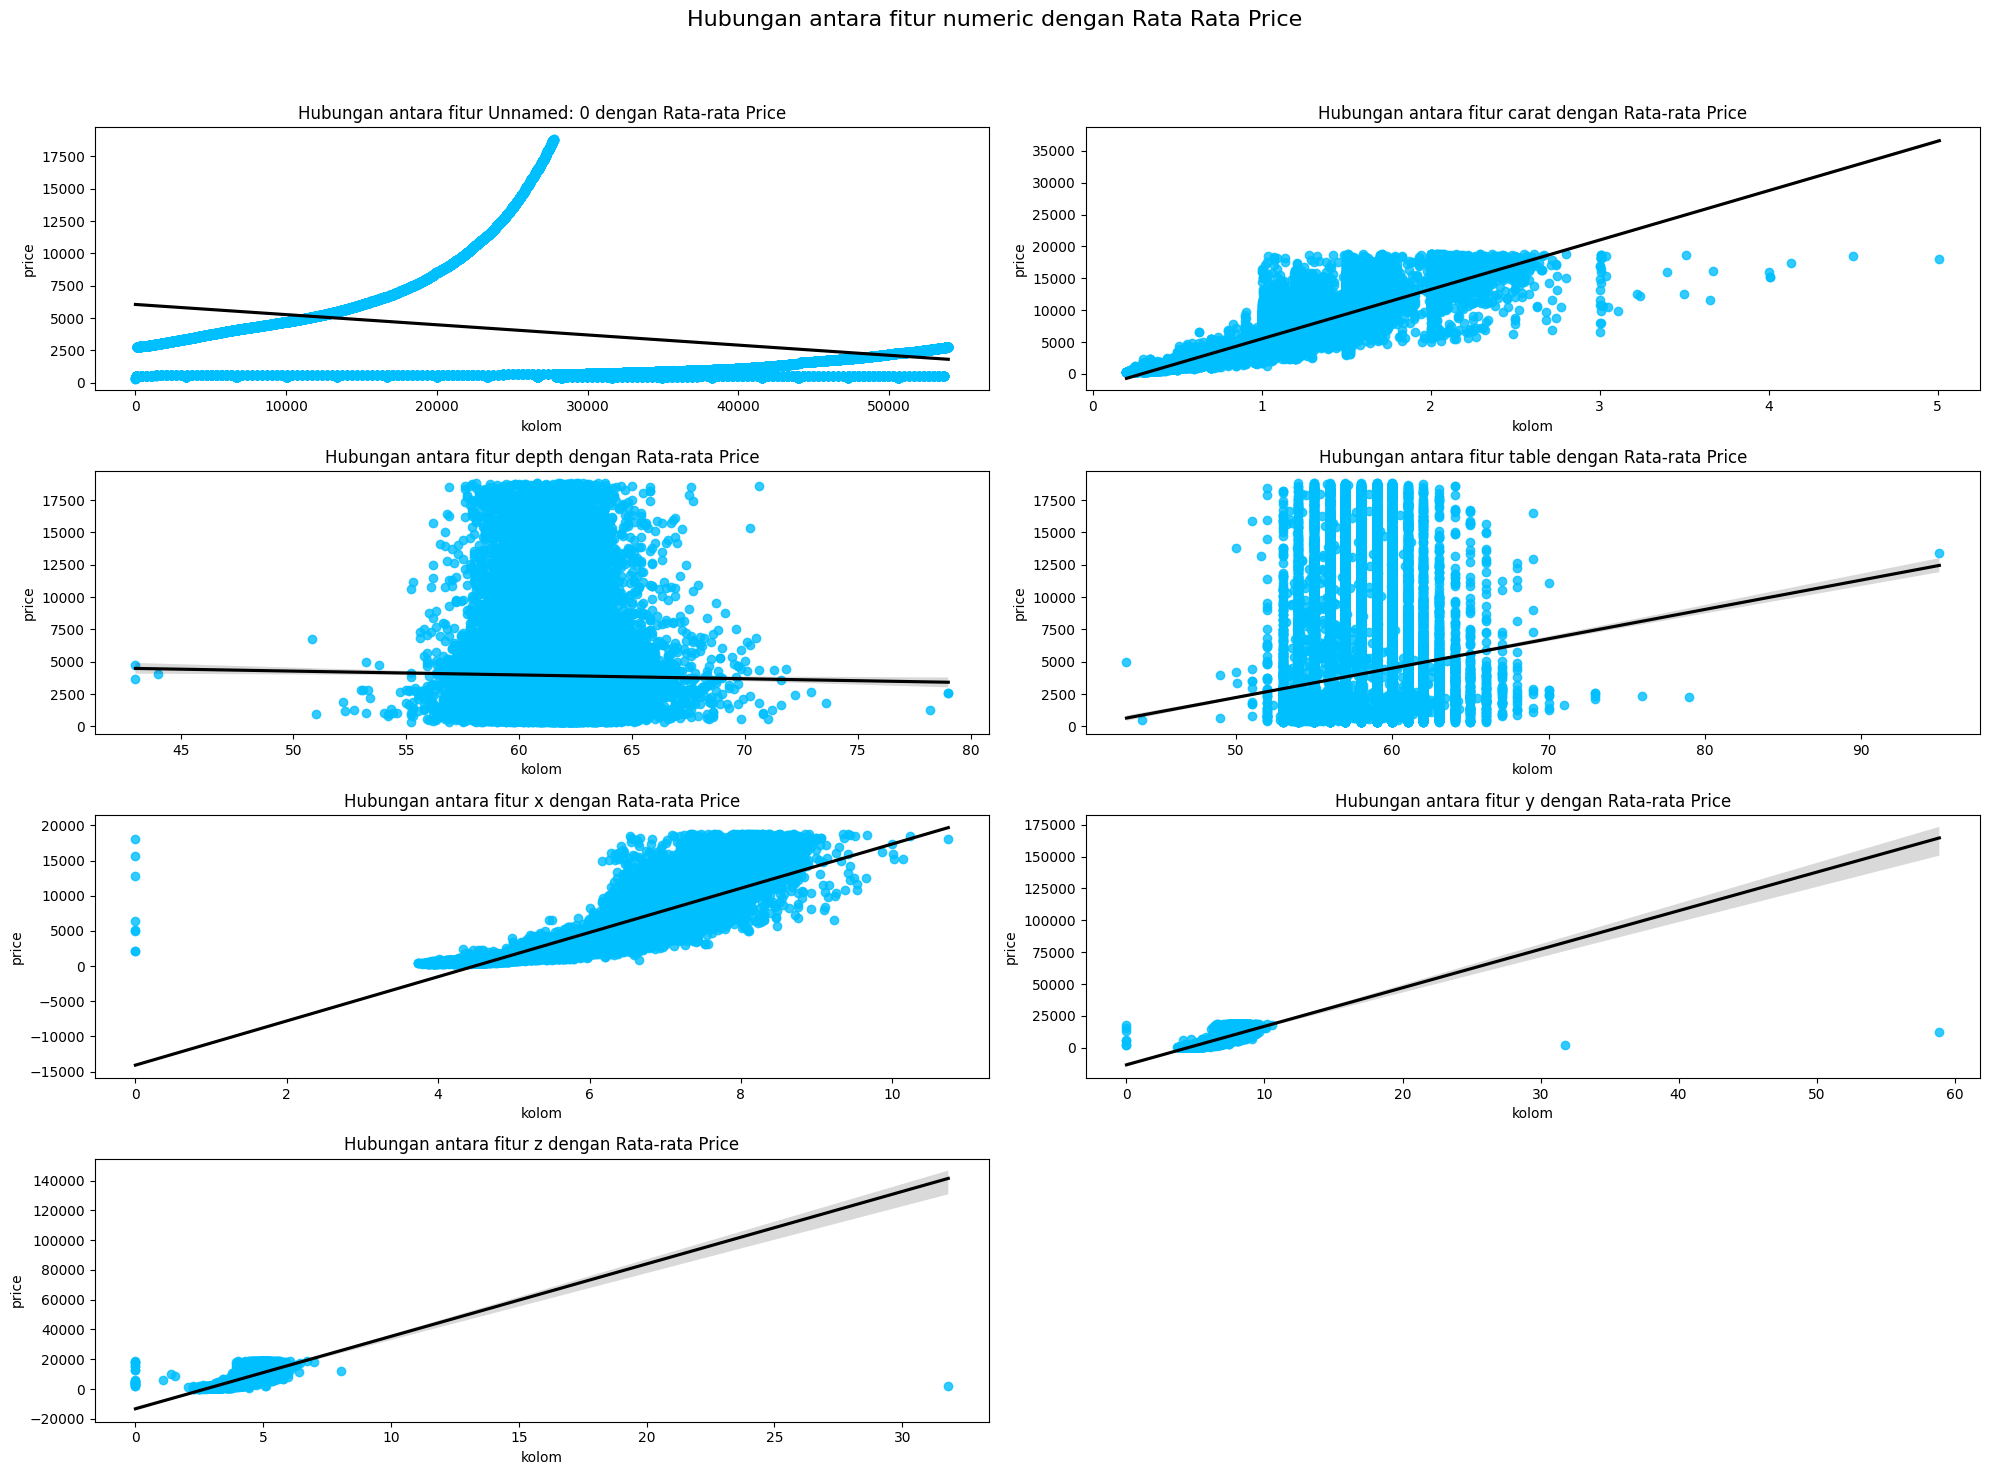

In [ ]:
# Membuat visualisasi regplot

## Mempersiapkan datanya
max_col = 2
max_row = math.ceil(len(diamonds_df_eda_num.drop(columns='price').columns)/max_col)

## Membuat plot
plt.figure(figsize=(20, 15))

for i, col in enumerate(diamonds_df_eda_num.drop(columns='price').columns):
  plt.subplot(max_row, max_col, i+1)
  sns.regplot(data=diamonds_df, x=col, y='price', scatter_kws={'color':'deepskyblue'}, line_kws={'color':'black'})
  plt.title(f'Hubungan antara fitur {col} dengan Rata-rata Price')
  plt.xlabel('kolom')
  plt.ylabel('price')

plt.suptitle('Hubungan antara fitur numeric dengan Rata Rata Price', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### b. Heatmap

In [ ]:
corr_matrix = diamonds_df_eda_num.corr().round(2)
corr_matrix

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.00,-0.38,-0.03,-0.10,-0.31,-0.41,-0.40,-0.40
carat,-0.38,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,-0.03,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,-0.10,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,-0.31,0.92,-0.01,0.13,1.00,0.88,0.87,0.86
x,-0.41,0.98,-0.03,0.20,0.88,1.00,0.97,0.97
y,-0.40,0.95,-0.03,0.18,0.87,0.97,1.00,0.95
z,-0.40,0.95,0.09,0.15,0.86,0.97,0.95,1.00


<Axes: >

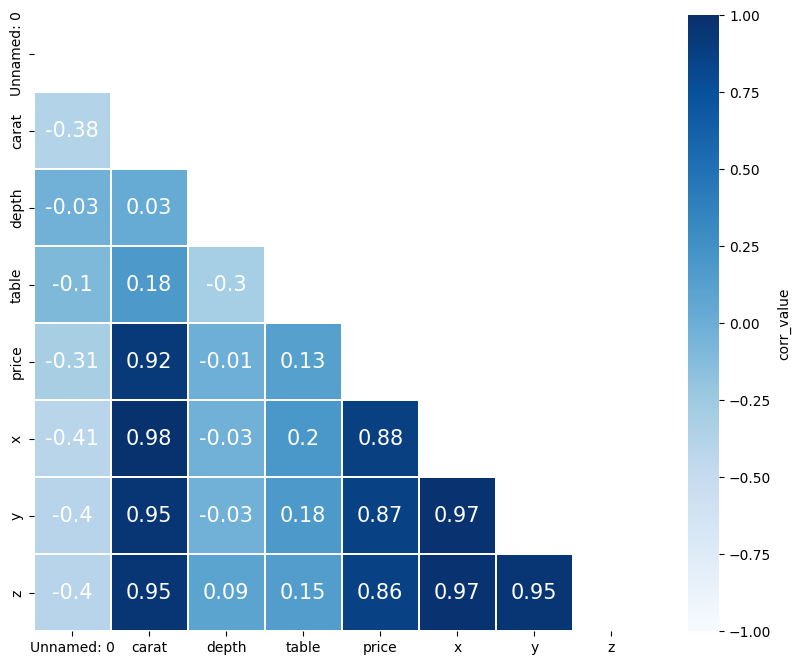

In [ ]:
# Membuat Grafik Heatmap
plt.figure(figsize=(10,8), dpi=100)
sns.heatmap(
    data=corr_matrix,
    vmin=-1,
    vmax=1,
    cmap='Blues',
    annot=True,
    annot_kws={'size':15, 'color':'white'},
    cbar_kws={'label':'corr_value'},
    square = True,
    lw = 0.1,
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool))
)

- Insight:
  - Berdasarkan dua visualisasi yang diberikan, terlihat hubungan antara masing-masing fitur dengan label (price) sebagai berikut:
  1. Tidak Ada Korelasi
      - Fitur depth tidak menunjukkan korelasi dengan price. Hal ini terlihat dari regplot yang garis regresinya yang sejajar, serta tidak ada pola yang jelas antara depth dan price. Hal ini menyebabkan fitur **depth** dapat dihapus saat proses preprocessing.

  2. Korelasi Sangat Lemah
      - Fitur table memiliki korelasi positif yang sangat lemah dengan price. Ditunjukkan oleh regplot yang hanya menunjukkan kenaikan yang sangat kecil, serta nilai korelasi yang rendah, yaitu sekitar 0.13.

  3. Korelasi Sangat Kuat
      - Fitur carat, x, y, dan z menunjukkan korelasi positif yang sangat kuat dengan price. Artinya, semakin besar ukuran dan berat diamond, maka harga cenderung semakin tinggi.

  4. Korelasi Antar Fitur
    - Terdapat korelasi sangat tinggi antar fitur carat, x, y, dan z (corr ≈ 0.96-1), yang mengindikasikan adanya multikolinearitas. Hal ini dapat memengaruhi hasil pelatihan model regresi. Disarankan untuk mereduksi fitur-fitur ini, misalnya dengan PCA atau membuat satu fitur gabungan (seperti volume atau ukuran total) pada saat preprocessing.


### 2.7 Outlier (Menelaah Data)

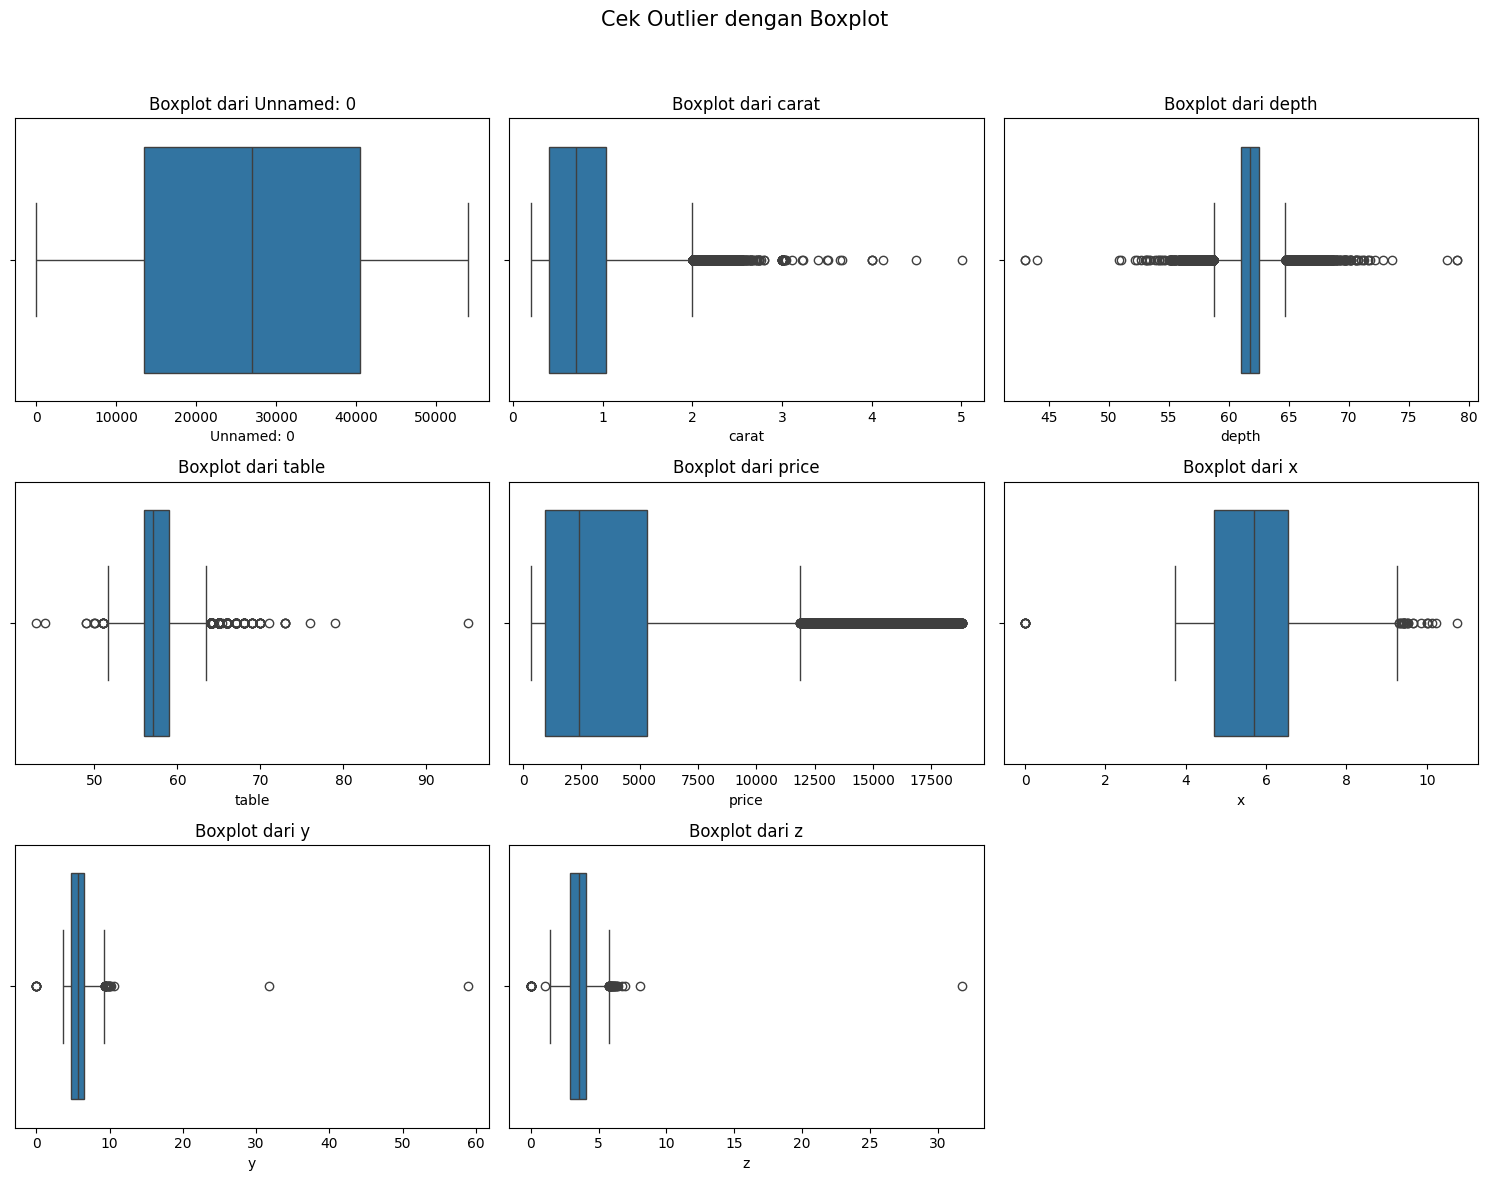

In [ ]:
# Membuat visualisasi (boxplot) untuk melihat outlier dari masing-masing data

## Mempersiapkan data
max_col = 3
max_row = math.ceil(len(diamonds_df_eda_num.columns)/max_col)

## Membuat plot
plt.figure(figsize=(15, 12))
for i, col in enumerate(diamonds_df_eda_num.columns):
  plt.subplot(max_row, max_col, i+1)
  sns.boxplot(data = diamonds_df_eda_num, x=col)
  plt.title(f'Boxplot dari {col}')

## Menampilkan plot
plt.suptitle('Cek Outlier dengan Boxplot', size=15)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

### 2.8 Drop Feature unnamed : 0 (Menentukan Objek Data)

In [ ]:
# Menghapus kolom unnamed 0
diamonds_df_eda = diamonds_df.drop(columns='Unnamed: 0')

### 2.9 Missing Values & Duplicated Data (Memvalidasi Data)

In [ ]:
# Cek nilai missing
diamonds_df_eda.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
print(f'Jumlah data duplikat yang ditemukan : {diamonds_df_eda.duplicated().sum()}')

Jumlah data duplikat yang ditemukan : 146


### 2.10 Drop Feature depth (Menentukan Objek Data)

- Berdasarkan hasil eksplorasi data (EDA), terdapat satu fitur yang tidak berpengaruh terhadap harga diamond, yaitu fitur depth.

- Fitur ini akan dihapus agar analisis dan pemodelan menjadi lebih efisien

In [ ]:
# Menghapus kolom depth
diamonds_df_eda = diamonds_df_eda.drop(columns='depth')
diamonds_df_eda.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


### 2.11 Handling Duplikat & Outlier (Membersihkan Data)

In [ ]:
# Menghapus data duplikat
diamonds_df_eda = diamonds_df_eda.drop_duplicates()

In [ ]:
# Menghapus Outlier
num_feature = diamonds_df_eda.select_dtypes(include='number')

# Menentukan IQR
Q1 = num_feature.quantile(q=0.25)
Q3 = num_feature.quantile(q=0.75)
IQR = Q3-Q1

# Menentukan Batas Bawah dan Batas Atas
BB = Q1 - (IQR * 1.5)
BA = Q3 + (IQR * 1.5)

# Cek dan hapus outlier
mask_outlier = ((num_feature < BB) | (num_feature > BA)).any(axis=1)
clean_index = num_feature.index[~mask_outlier]
diamonds_df_eda_final = diamonds_df_eda.loc[clean_index]

In [ ]:
print(f'Jumlah baris dan kolom sebelum penanganan adalah {diamonds_df_eda.shape}')
print(f'Jumlah baris dan kolom setelah penanganan adalah {diamonds_df_eda_final.shape}')

Jumlah baris dan kolom sebelum penanganan adalah (53792, 9)
Jumlah baris dan kolom setelah penanganan adalah (49490, 9)


In [ ]:
diamonds_df_eda_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,49490.0,0.716165,0.372159,0.20,0.38,0.65,1.01,2.00
table,49490.0,57.336318,2.072347,52.00,56.00,57.00,59.00,63.50
price,49490.0,3131.206021,2740.463502,326.00,905.00,2124.00,4641.00,11888.00
x,49490.0,5.567833,0.979811,3.73,4.66,5.55,6.42,8.28
y,49490.0,5.571334,0.973168,3.68,4.67,5.54,6.42,8.27
z,49490.0,3.440194,0.606978,1.41,2.87,3.41,3.98,5.37


## 3.&nbsp;Data Preparation (Preprocessing)

In [ ]:
# Mengganti nama DataFrame
diamonds_df_clean = diamonds_df_eda_final.copy()

### 3.1 Mengidentifikasi Fitur (X) dan Label (y)
- Dari dataset diamond , fitur (X) terdiri dari seluruh kolom kecuali kolom price.

- Kolom price digunakan sebagai label (y) karena merupakan target yang ingin diprediksi.

In [ ]:
# Mengidentifikasikan Fitur X dan Label y
X = diamonds_df_clean.drop(columns='price')
y = diamonds_df_clean['price']

### 3.2 Split Data Train - Testing
- Disini dilakukan pembangian datanya dengan proporsi 80% data latih dan 20% data uji

In [ ]:
# Melakukan split data Train Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Jumlah data awalnya : {len(X)}')
print(f'Jumlah data train : {len(X_train)}')
print(f'Jumlah data test : {len(X_test)}')

Jumlah data awalnya : 49490
Jumlah data train : 39592
Jumlah data test : 9898


### 3.3 Feature Encoding
- Adapun tahapan terakhir dalam data preparation adalah dilakukan encoding pada kolom fitur kategorikal menggunakan teknik ordinal encoding.

- Ordinal encoding dipilih karena fitur-fitur kategorikal memiliki urutan atau hubungan numerik yang jelas terhadap label (bersifat nominal), sehingga teknik ini paling sesuai untuk merepresentasikan nilai-nilai kategorikal tersebut secara adil tanpa memberikan bobot tertentu.

In [ ]:
# Encoding menggunakan Ordinal Encoder
categorical_cols = ['cut', 'color', 'clarity']
numerical_cols = ['carat', 'table', 'x', 'y', 'z']

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Melakukan encoding untuk data Train
X_train_encoded_cat = encoder.fit_transform(X_train[categorical_cols])

# Menerapkan encoding pada data Test
X_test_encoded_cat = encoder.transform(X_test[categorical_cols])

# Membuat DataFrame untuk kolom kategori yang telah di encoding
X_train_encoded_df = pd.DataFrame(X_train_encoded_cat, columns=categorical_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded_cat, columns=categorical_cols, index=X_test.index)

# Menggabungkan kolom kategori dengan numerik
X_train_processed = pd.concat([X_train_encoded_df, X_train[numerical_cols]], axis=1)
X_test_processed = pd.concat([X_test_encoded_df, X_test[numerical_cols]], axis=1)

print("Data Asli (X_train - Categorical Columns):")
print(X_train[categorical_cols].head())
print("\nData Setelah Encoding (X_train - Categorical Columns):")
print(X_train_encoded_df.head())

print("\nData Asli (X_test - Categorical Columns):")
print(X_test[categorical_cols].head())
print("\nData Setelah Encoding (X_test - Categorical Columns):")
print(X_test_encoded_df.head())

print("\nProcessed Training Data (Combined):")
print(X_train_processed.head())
print("\nProcessed Test Data (Combined):")
print(X_test_processed.head())

Data Asli (X_train - Categorical Columns):
             cut color clarity
14268  Very Good     G     VS2
20850    Premium     E     SI2
40701  Very Good     E     VS1
8457   Very Good     G     SI2
50835    Premium     E     SI1

Data Setelah Encoding (X_train - Categorical Columns):
       cut  color  clarity
14268  4.0    3.0      5.0
20850  3.0    1.0      3.0
40701  4.0    1.0      4.0
8457   4.0    3.0      3.0
50835  3.0    1.0      2.0

Data Asli (X_test - Categorical Columns):
           cut color clarity
10111     Good     D     VS2
11473    Ideal     H     VS1
34995  Premium     D    VVS1
15078    Ideal     E     SI2
8095   Premium     G     SI1

Data Setelah Encoding (X_test - Categorical Columns):
       cut  color  clarity
10111  1.0    0.0      5.0
11473  2.0    4.0      4.0
34995  3.0    0.0      6.0
15078  2.0    1.0      3.0
8095   3.0    3.0      2.0

Processed Training Data (Combined):
       cut  color  clarity  carat  table     x     y     z
14268  4.0    3.0      

In [ ]:
print(X_train_processed['color'].value_counts())
print("\n",X_train['color'].value_counts())

color
3.0    8350
1.0    7404
2.0    7135
4.0    6013
0.0    5091
5.0    3722
6.0    1877
Name: count, dtype: int64

 color
G    8350
E    7404
F    7135
H    6013
D    5091
I    3722
J    1877
Name: count, dtype: int64


In [ ]:
value_color = X_train[['color']].join(X_train_processed['color'], lsuffix='_original', rsuffix='_encoded').sort_values(by='color_original', ascending=False)

print("\nGabungan")
print(value_color)


Gabungan
      color_original  color_encoded
31396              J            6.0
20134              J            6.0
45169              J            6.0
15410              J            6.0
2971               J            6.0
...              ...            ...
38678              D            0.0
33314              D            0.0
7221               D            0.0
32382              D            0.0
34313              D            0.0

[39592 rows x 2 columns]


## 4.&nbsp;Modeling
- ada tahap ini, dilakukan pembuatan dan pelatihan model machine learning dengan menggunakan 5 algoritma regresi. Tujuannya adalah untuk membandingkan performa masing-masing model dan memilih model terbaik berdasarkan metrik evaluasi.

Adapun model-model yang digunakan adalah sebagai berikut:
  1. Decision Tree Regressor
  2. Random Forest Regressor
  3. Gradient Boosting Regressor
  4. XGBoost Regressor
  5. LightGBM Regressor
  6. Linear Regression
  7. ElasticNet

Setiap model akan dievaluasi menggunakan metrik seperti Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan R-squared (R²).

### 4.1 Baseline Model
- Pada tahapan ini dilakukan pelatihan dengan menggunakan baseline atau parameter bawaan dari model tanpa perubahan apapun

In [ ]:
# Daftar model baseline
models = {
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42, verbosity=0),
    'LGBMRegressor': LGBMRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(random_state=42)
}

results = []

# Evaluasi baseline model
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2})

results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False).reset_index(drop=True)
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 39592, number of used features: 8
[LightGBM] [Info] Start training from score 3139.945393


,Model,MAE,RMSE,R2
0,LGBMRegressor,211.912335,365.106829,0.982073
1,XGBRegressor,205.209076,369.685149,0.981620
2,RandomForestRegressor,201.401526,370.620602,0.981527
3,GradientBoostingRegressor,273.284436,456.810357,0.971936
4,DecisionTreeRegressor,270.788493,502.503712,0.966041
5,LinearRegression,620.714665,937.774966,0.881732
6,ElasticNet,821.642745,1201.572289,0.805835


### 4.2 Hyperparameter Tuning
- Pada tahap ini, dilakukan pelatihan model dengan Grid Search untuk melakukan penyesuaian hyperparameter secara sistematis guna memperoleh kombinasi parameter terbaik yang menghasilkan performa model optimal.

In [ ]:
# Corrected param_grid order to match the models list
param_grids = {
    # 1. DecisionTreeRegressor
    'DecisionTreeRegressor': {
        'max_depth': [None, 5, 15],
        'min_samples_split': [2, 5],
        'max_leaf_nodes': [None, 15, 30],
        'min_samples_leaf': [1, 2],
        'max_features': [None, 'sqrt']
    },

    # 2. RandomForestRegressor
    'RandomForestRegressor': {
        'n_estimators': [100, 50, 500],
        'max_depth': [None, 5],
        'max_leaf_nodes': [None, 15, 30],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': [1.0, 'sqrt', None]
    },

    # 3. GradientBoostingRegressor
    'GradientBoostingRegressor': {
        'n_estimators': [100, 500],
        'learning_rate': [0.1, 0.01, 0.05],
        'max_depth': [3, 5, None]
    },

    # 4. XGBRegressor
    'XGBRegressor': {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },

    # 5. LGBMRegressor
    'LGBMRegressor': {
        'n_estimators': [100, 500],
        'learning_rate': [0.1, 0.01, 0.05],
        'max_depth': [-1, 3, 5],
        'num_leaves': [31, 15, 70],
        'min_data_in_leaf': [20, 10],
        'verbosity': [-1]
    },

    # 6. LinearRegression
    'LinearRegression': {
        'fit_intercept': [True, False],
        'positive': [False, True]
    },

    # 7. ElasticNet
    'ElasticNet': {
        'alpha': [0.1, 1.0, 10.0],
        'l1_ratio': [0.1, 0.5, 0.9]
    }
}

# Inisiasi semua model
models = {
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42, verbosity=0),
    'LGBMRegressor': LGBMRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(random_state=42)
}

best_models = {}

for name, model in models.items():
    print(f'\nGrid Search untuk model: {name}')
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=2,
        n_jobs=-1
    )
    grid.fit(X_train_processed, y_train)
    print(f'Best params {name}: {grid.best_params_}')
    best_models[name] = grid.best_estimator_

# Evaluasi model terbaik
results = []
for name, model in best_models.items():
    y_pred = model.predict(X_test_processed)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2})


Grid Search untuk model: DecisionTreeRegressor
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params DecisionTreeRegressor: {'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 5}

Grid Search untuk model: RandomForestRegressor
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best params RandomForestRegressor: {'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}

Grid Search untuk model: GradientBoostingRegressor
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params GradientBoostingRegressor: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}

Grid Search untuk model: XGBRegressor
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params XGBRegressor: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}

Grid Search untuk mo

In [ ]:
# Tampilkan hasil
results_tuned_df = pd.DataFrame(results).sort_values(by='R2', ascending=False).reset_index(drop=True)
print("\n=== Hasil Hyperparameter Tuning ===")
results_tuned_df


=== Hasil Hyperparameter Tuning ===


,Model,MAE,RMSE,R2
0,XGBRegressor,195.400467,354.556303,0.983094
1,LGBMRegressor,201.420882,359.172828,0.982651
2,GradientBoostingRegressor,204.519427,359.690144,0.982601
3,RandomForestRegressor,199.619431,367.974140,0.981790
4,DecisionTreeRegressor,244.162439,447.098331,0.973117
5,LinearRegression,620.714665,937.774966,0.881732
6,ElasticNet,763.426197,1039.085555,0.854797


## 5.&nbsp;Evaluasi Model

### 5.1 Evaluasi menggunakan Metrik
- Pada tahap ini, model terbaik dicari berdasarkan perhitungan metrik MAE, RMSE, dan R², baik sebelum maupun setelah dilakukan tuning.

In [ ]:
# --- Menampilkan Perbandingan Hasil ---
results_comparison = results_df.merge(results_tuned_df, on='Model', suffixes=('_before', '_after')).sort_values(by='R2_after', ascending=False)
print("\n=== Perbandingan Hasil Evaluasi (Before vs After) ===")
results_comparison


=== Perbandingan Hasil Evaluasi (Before vs After) ===


,Model,MAE_before,RMSE_before,R2_before,MAE_after,RMSE_after,R2_after
1,XGBRegressor,205.209076,369.685149,0.981620,195.400467,354.556303,0.983094
0,LGBMRegressor,211.912335,365.106829,0.982073,201.420882,359.172828,0.982651
3,GradientBoostingRegressor,273.284436,456.810357,0.971936,204.519427,359.690144,0.982601
2,RandomForestRegressor,201.401526,370.620602,0.981527,199.619431,367.974140,0.981790
4,DecisionTreeRegressor,270.788493,502.503712,0.966041,244.162439,447.098331,0.973117
5,LinearRegression,620.714665,937.774966,0.881732,620.714665,937.774966,0.881732
6,ElasticNet,821.642745,1201.572289,0.805835,763.426197,1039.085555,0.854797


#### 5.2 Feature Importance

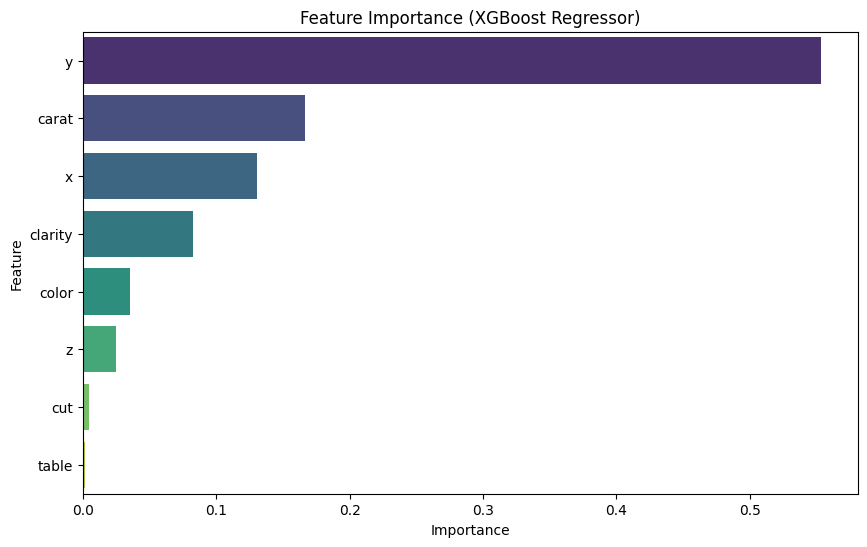

In [ ]:
# Membuat feature importance
xgb_model = XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 7, n_estimators= 300, subsample= 1.0, random_state=42)
xgb_model.fit(X_train_processed, y_train)

importances = xgb_model.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train_processed.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Feature Importance (XGBoost Regressor)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### 5.2 Evaluasi menggunakan SHAP
- Pada tahap ini, dilakukan evaluasi dengan melihat kontribusi setiap fitur dari model XGBoost yang telah dilatih dan menjadi model terbaiknya.

'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0

100%|===================| 9878/9898 [03:17<00:00]       

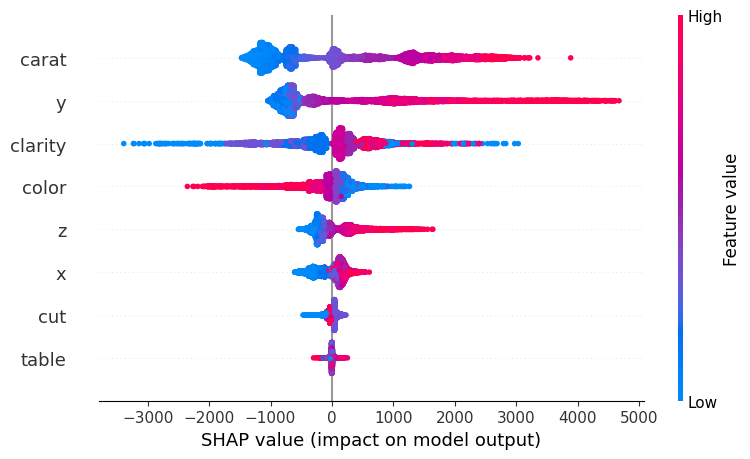

In [ ]:
# Menampilkan interpretasi setiap fitur
xgb_model = XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 7, n_estimators= 300, subsample= 1.0, random_state=42)
xgb_model.fit(X_train_processed, y_train)

explainer = shap.Explainer(xgb_model, X_train_processed)
shap_values = explainer(X_test_processed)

feature_names = X_train_processed.columns.tolist()

X_test_named = pd.DataFrame(X_test_processed, columns=feature_names)
shap.summary_plot(shap_values, X_test_named)

In [ ]:
# Prediksi pada data train dan test
y_train_pred = xgb_model.predict(X_train_processed)
y_test_pred = xgb_model.predict(X_test_processed)

# Fungsi bantu untuk menghitung metrik
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluasi
mae_train, rmse_train, r2_train = evaluate(y_train, y_train_pred)
mae_test, rmse_test, r2_test = evaluate(y_test, y_test_pred)

# Tampilkan hasil
print(f"\nEvaluasi Model Terbaik: {xgb_model.__class__.__name__}")
print("------------------------------------------------")
print(f"Train MAE : {mae_train:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Train R²  : {r2_train:.4f}")
print("------------------------------------------------")
print(f"Test MAE  : {mae_test:.4f}")
print(f"Test RMSE : {rmse_test:.4f}")
print(f"Test R²   : {r2_test:.4f}")


Evaluasi Model Terbaik: XGBRegressor
------------------------------------------------
Train MAE : 150.4767
Train RMSE: 250.9387
Train R²  : 0.9916
------------------------------------------------
Test MAE  : 195.4005
Test RMSE : 354.5563
Test R²   : 0.9831


### 5.3 Evaluasi Perbandingan Data Hasil Prediksi terhadap Data Asli
- Untuk membuat perbandingannya dilakukan dengan menggunakan scatterplot dan lineplot dalam satu grafik.

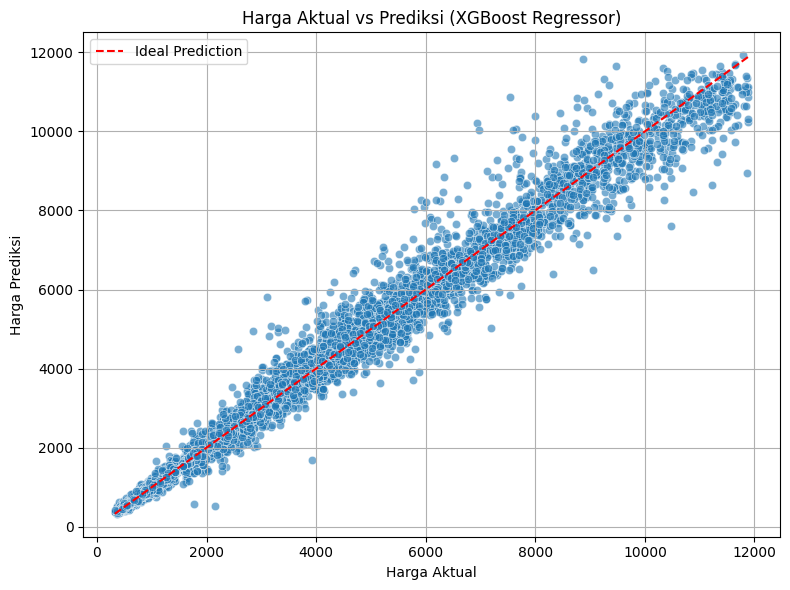

In [ ]:
# Lakukan prediksi menggunakan model terbaik pada data uji
y_pred_tuned = xgb_model.predict(X_test_processed)

# Buat DataFrame untuk visualisasi scatter plot (Aktual vs Prediksi)
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_tuned})

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=df_plot, alpha=0.6)
plt.plot([df_plot['Actual'].min(), df_plot['Actual'].max()],
         [df_plot['Actual'].min(), df_plot['Actual'].max()],
         color='red', linestyle='--', label='Ideal Prediction')

plt.title('Harga Aktual vs Prediksi (XGBoost Regressor)')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 6.&nbsp;Deployment

In [ ]:
# Deployment menggunakan pickle
# Simpan Encoding
with open('ordinal_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

# Simpan Model
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

# Simpan X_test dan y_test
with open('X_test.pkl', 'wb') as file:
    pickle.dump(X_test, file)

with open('y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)

In [ ]:
# Load model & preprocessing
with open('xgb_model.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

with open('ordinal_encoder.pkl', 'rb') as file:
    encoder = pickle.load(file)

# Validasi fitur kategori
valid_cuts = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
valid_colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
valid_clarities = ['SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']

# Input data pengguna
try:
    carat = float(input("Masukkan nilai carat: "))
    cut = input("Masukkan nilai cut (Ideal/Premium/Very Good/Good/Fair): ")
    color = input("Masukkan nilai color (D/E/F/G/H/I/J): ")
    clarity = input("Masukkan nilai clarity (SI1/SI2/VS1/VS2/VVS1/VVS2/IF): ")
    table = float(input("Masukkan nilai table: "))
    x = float(input("Masukkan nilai x: "))
    y = float(input("Masukkan nilai y: "))
    z = float(input("Masukkan nilai z: "))
except ValueError:
    print("Pastikan semua input numerik (carat, table, x, y, z) diisi dengan angka.")
    exit()

# Validasi kategori
if cut not in valid_cuts or color not in valid_colors or clarity not in valid_clarities:
    print("Kategori cut, color, atau clarity tidak valid.")
    exit()

# Buat DataFrame dari input
input_data = pd.DataFrame({
    'carat': [carat],
    'cut': [cut],
    'color': [color],
    'clarity': [clarity],
    'table': [table],
    'x': [x],
    'y': [y],
    'z': [z]
})

# Encoding
categorical_cols = ['cut', 'color', 'clarity']
numerical_cols = ['carat', 'table', 'x', 'y', 'z']

input_data_encoded_cat = encoder.transform(input_data[categorical_cols])
input_data_encoded_df = pd.DataFrame(input_data_encoded_cat, columns=categorical_cols, index=input_data.index)

# Gabungkan dengan kolom numerik
input_data_processed = pd.concat([input_data_encoded_df, input_data[numerical_cols]], axis=1)

# Urutkan kolom agar cocok dengan model
input_data_processed = input_data_processed[xgb_model.feature_names_in_]

# Prediksi
prediction = xgb_model.predict(input_data_processed)

# Output
print(f"\nPerkiraan harga berlian: ${prediction[0]:,.2f}")

Masukkan nilai carat: 10
Masukkan nilai cut (Ideal/Premium/Very Good/Good/Fair): Good
Masukkan nilai color (D/E/F/G/H/I/J): F
Masukkan nilai clarity (SI1/SI2/VS1/VS2/VVS1/VVS2/IF): VS2
Masukkan nilai table: 66
Masukkan nilai x: 4
Masukkan nilai y: 3
Masukkan nilai z: 6

Perkiraan harga berlian: $5,884.90
